In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
from scipy import stats
import pandas as pd
import numpy as np
import base64,os,random,gc
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.pyplot as plotter
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import optuna
import xgboost as xgb
from xgboost import XGBClassifier
import catboost
from catboost import CatBoostClassifier
import lightgbm as lgbm
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin,ClassifierMixin, clone
from sklearn.model_selection import KFold
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn import datasets
optuna.logging.set_verbosity(optuna.logging.WARNING)
from lightgbm import *
pd.set_option("display.max_columns", None)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#import eli5
#from eli5.sklearn import PermutationImportance
import warnings
warnings.filterwarnings('ignore')

In [19]:
import os
print(os.getcwd())

C:\Users\khyat


In [20]:
df = pd.read_csv('ocd_patient_dataset.csv')

In [21]:
import pandas as pd
train = pd.read_csv('ocd_patient_dataset.csv')

In [22]:
print(df.head())

   Patient ID  Age  Gender Ethnicity Marital Status Education Level  \
0        1018   32  Female   African         Single    Some College   
1        2406   69    Male   African       Divorced    Some College   
2        1188   57    Male  Hispanic       Divorced  College Degree   
3        6200   27  Female  Hispanic        Married  College Degree   
4        5824   56  Female  Hispanic        Married     High School   

  OCD Diagnosis Date  Duration of Symptoms (months) Previous Diagnoses  \
0         2016-07-15                            203                MDD   
1         2017-04-28                            180               None   
2         2018-02-02                            173                MDD   
3         2014-08-25                            126               PTSD   
4         2022-02-20                            168               PTSD   

  Family History of OCD Obsession Type Compulsion Type  \
0                    No   Harm-related        Checking   
1           

In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1500 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [24]:
print(df.isnull().sum())

Patient ID                       0
Age                              0
Gender                           0
Ethnicity                        0
Marital Status                   0
Education Level                  0
OCD Diagnosis Date               0
Duration of Symptoms (months)    0
Previous Diagnoses               0
Family History of OCD            0
Obsession Type                   0
Compulsion Type                  0
Y-BOCS Score (Obsessions)        0
Y-BOCS Score (Compulsions)       0
Depression Diagnosis             0
Anxiety Diagnosis                0
Medications                      0
dtype: int64


In [25]:
print(df.describe())


        Patient ID          Age  Duration of Symptoms (months)  \
count  1500.000000  1500.000000                    1500.000000   
mean   5541.254000    46.781333                     121.745333   
std    2562.389469    16.830321                      67.404610   
min    1017.000000    18.000000                       6.000000   
25%    3338.000000    32.000000                      64.000000   
50%    5539.500000    47.000000                     121.000000   
75%    7745.500000    61.000000                     178.000000   
max    9995.000000    75.000000                     240.000000   

       Y-BOCS Score (Obsessions)  Y-BOCS Score (Compulsions)  
count                1500.000000                  1500.00000  
mean                   20.048000                    19.62600  
std                    11.823884                    11.78287  
min                     0.000000                     0.00000  
25%                    10.000000                     9.00000  
50%                    20.0

train


Patient ID                       0
Age                              0
Gender                           0
Ethnicity                        0
Marital Status                   0
Education Level                  0
OCD Diagnosis Date               0
Duration of Symptoms (months)    0
Previous Diagnoses               0
Family History of OCD            0
Obsession Type                   0
Compulsion Type                  0
Y-BOCS Score (Obsessions)        0
Y-BOCS Score (Compulsions)       0
Depression Diagnosis             0
Anxiety Diagnosis                0
Medications                      0
dtype: int64

<Axes: title={'center': 'TrainingSet'}>

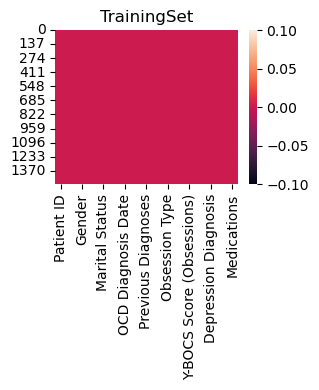

In [26]:
print('train')
display(train.isnull().sum())
plt.figure(figsize=(10,2))
plt.subplot(1,3,1)
plt.title("TrainingSet")
sns.heatmap(train.isnull())

In [27]:
print(df.describe(include=['O']))

       Gender  Ethnicity Marital Status Education Level OCD Diagnosis Date  \
count    1500       1500           1500            1500               1500   
unique      2          4              3               4               1218   
top      Male  Caucasian         Single    Some College         2017-06-21   
freq      753        398            511             394                  4   

       Previous Diagnoses Family History of OCD Obsession Type  \
count                1500                  1500           1500   
unique                  5                     2              5   
top                   MDD                   Yes   Harm-related   
freq                  345                   760            333   

       Compulsion Type Depression Diagnosis Anxiety Diagnosis     Medications  
count             1500                 1500              1500            1500  
unique               5                    2                 2               4  
top            Washing                

In [29]:
import missingno as msno

<Axes: >

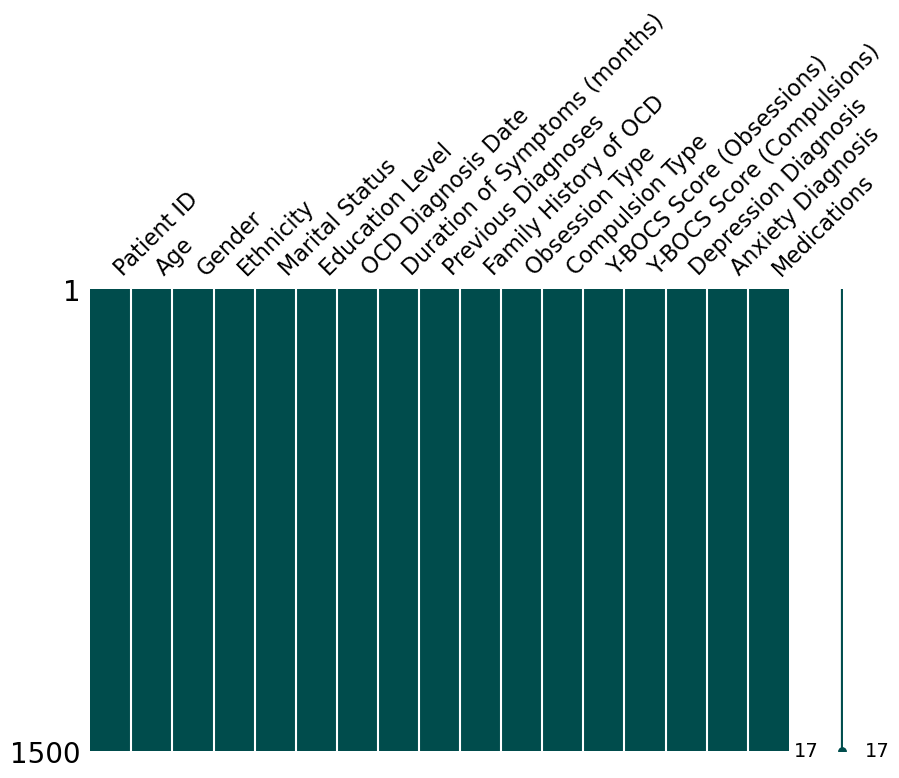

In [30]:
msno.matrix(df=train, figsize=(10,6), color=(0,.3,.3))

In [31]:
print('train')
display(train.info())

train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1500 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 1

None

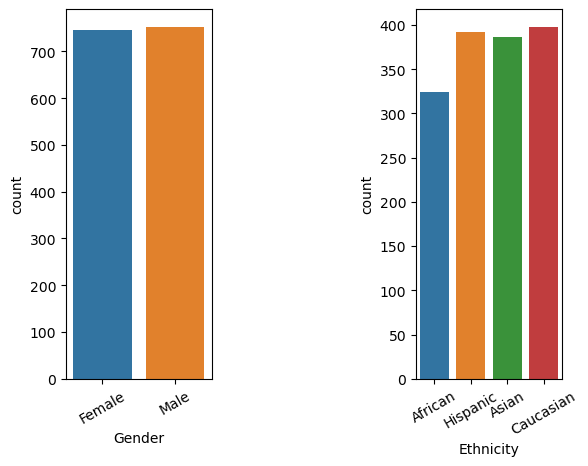

In [32]:
plt.subplot(1, 3, 1)
sns.countplot(x = train["Gender"])
plotter.xticks(rotation = 30);
plt.subplot(1, 3, 3)
sns.countplot(x = train["Ethnicity"])
plotter.xticks(rotation = 30);

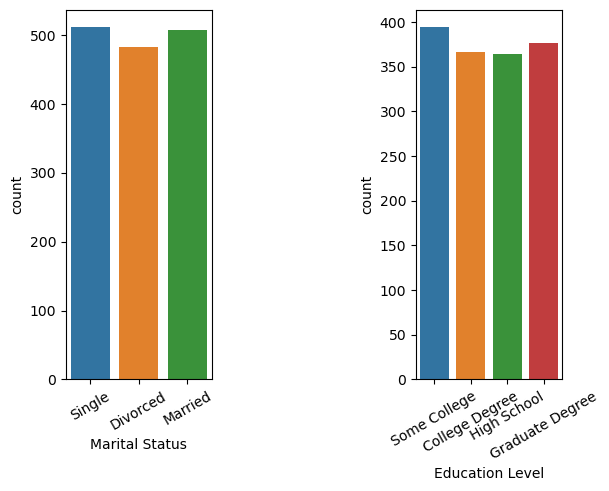

In [33]:
import matplotlib.pyplot as plt
plt.subplot(1, 3, 1)
sns.countplot(x = train["Marital Status"])
plotter.xticks(rotation = 30);
plt.subplot(1, 3, 3)
sns.countplot(x = train["Education Level"])
plotter.xticks(rotation = 30);

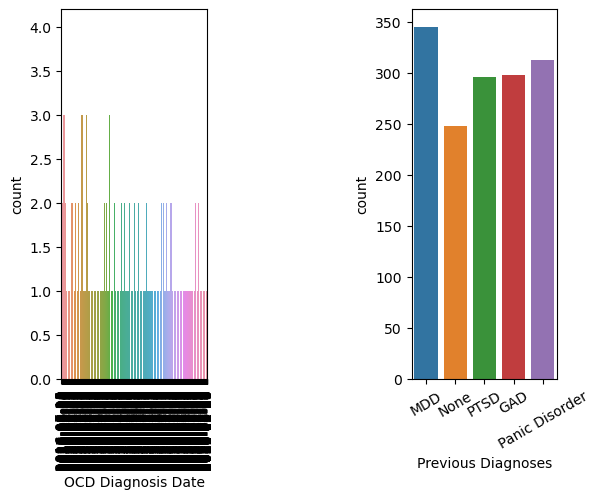

In [34]:
plt.subplot(1, 3, 1)
sns.countplot(x = train["OCD Diagnosis Date"])
plotter.xticks(rotation = 90);
plt.subplot(1, 3, 3)
sns.countplot(x = train["Previous Diagnoses"])
plotter.xticks(rotation = 30);

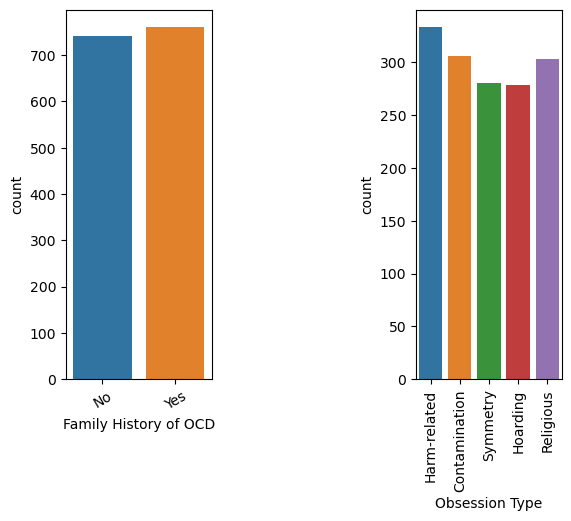

In [35]:
plt.subplot(1,3,1)
sns.countplot(x=train["Family History of OCD"])
plotter.xticks(rotation=30);
plt.subplot(1,3,3)
sns.countplot(x=train["Obsession Type"])
plotter.xticks(rotation=90);


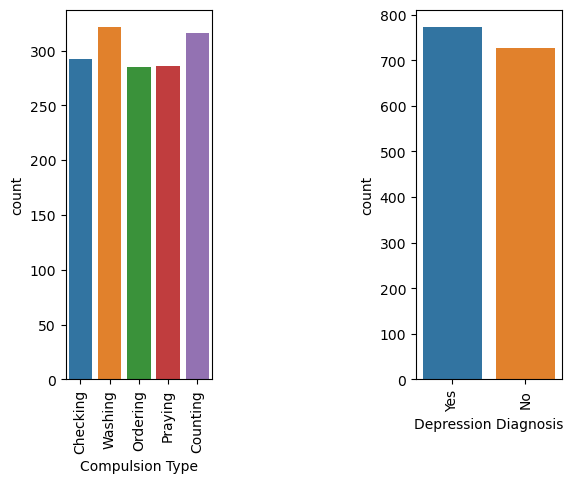

In [36]:
plt.subplot(1, 3, 1)
sns.countplot(x = train["Compulsion Type"])
plotter.xticks(rotation = 90);
plt.subplot(1, 3, 3)
sns.countplot(x = train["Depression Diagnosis"])
plotter.xticks(rotation = 90);

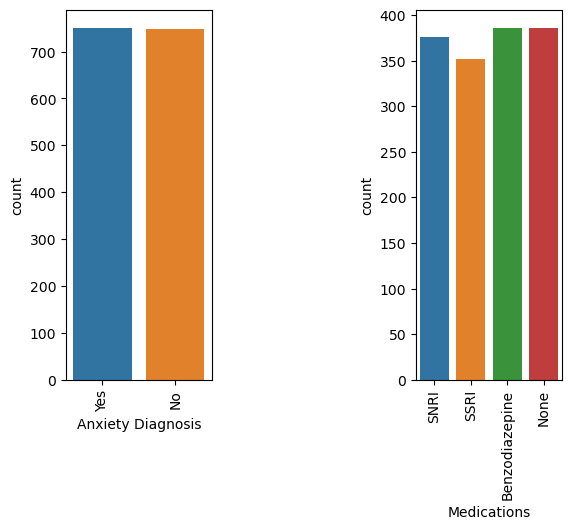

In [37]:
plt.subplot(1, 3, 1)
sns.countplot(x = train["Anxiety Diagnosis"])
plotter.xticks(rotation = 90);
plt.subplot(1, 3, 3)
sns.countplot(x = train["Medications"])
plotter.xticks(rotation = 90);

In [38]:
train["Gender"] = train["Gender"].replace({'Female':1,'Male':2})
train["Ethnicity"] = train["Ethnicity"].replace({'African':1,'Hispanic':2,'Asian':3,
'Caucasian':4})
train["Marital Status"] = train["Marital Status"].replace({'Single':1,'Divorced':2,'Married':3})
train["Education Level"] = train["Education Level"].replace({'Some College':1,'College Degree':2,
'High School':3,'Graduate Degree':4})
train=train.drop(columns=['OCD Diagnosis Date'],axis=1)
train["Previous Diagnoses"] = train["Previous Diagnoses"].replace({'MDD':1,'PTSD':2,'GAD':3,'Panic Disorder':4})
train["Family History of OCD"] = train["Family History of OCD"].replace({'No':1,'Yes':2})
train["Obsession Type"] = train["Obsession Type"].replace({'Harm-related':1,'Contamination':2,'Symmetry':3,
'Hoarding':4,'Religious':5})
train["CompulsionType"]=train["Compulsion Type"].replace({'Checking':1,'Washing':2,'Ordering':3,'Praying' 'Counting':5})
train["DepressionDiagnosis"]=train["Depression Diagnosis"].replace({'No':1,'Yes':2})
train["AnxietyDiagnosis"]=train["Anxiety Diagnosis"].replace({'No':1,'Yes':2})
train["Medications"]=train["Medications"].replace({'SNRI':0,'SSRI':1,'Benzodiazepine':2})
display(train)

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,CompulsionType,DepressionDiagnosis,AnxietyDiagnosis
0,1018,32,1,1,1,1,203,1,1,1,Checking,17,10,Yes,Yes,0,1,2,2
1,2406,69,2,1,2,1,180,None,2,1,Washing,21,25,Yes,Yes,1,2,2,2
2,1188,57,2,2,2,2,173,1,1,2,Checking,3,4,No,No,2,1,1,1
3,6200,27,1,2,3,2,126,2,2,3,Washing,14,28,Yes,Yes,1,2,2,2
4,5824,56,1,2,3,3,168,2,2,4,Ordering,39,18,No,No,None,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,2,2,2,2,53,1,1,2,Washing,21,33,Yes,Yes,1,2,2,2
1496,5013,19,1,2,2,4,160,3,2,4,Praying,25,16,Yes,Yes,1,Praying,2,2
1497,6089,40,2,3,3,1,100,None,2,2,Counting,2,15,Yes,Yes,2,Counting,2,2
1498,3808,37,1,4,3,1,210,3,2,2,Washing,16,7,Yes,No,2,2,2,1


<Axes: >

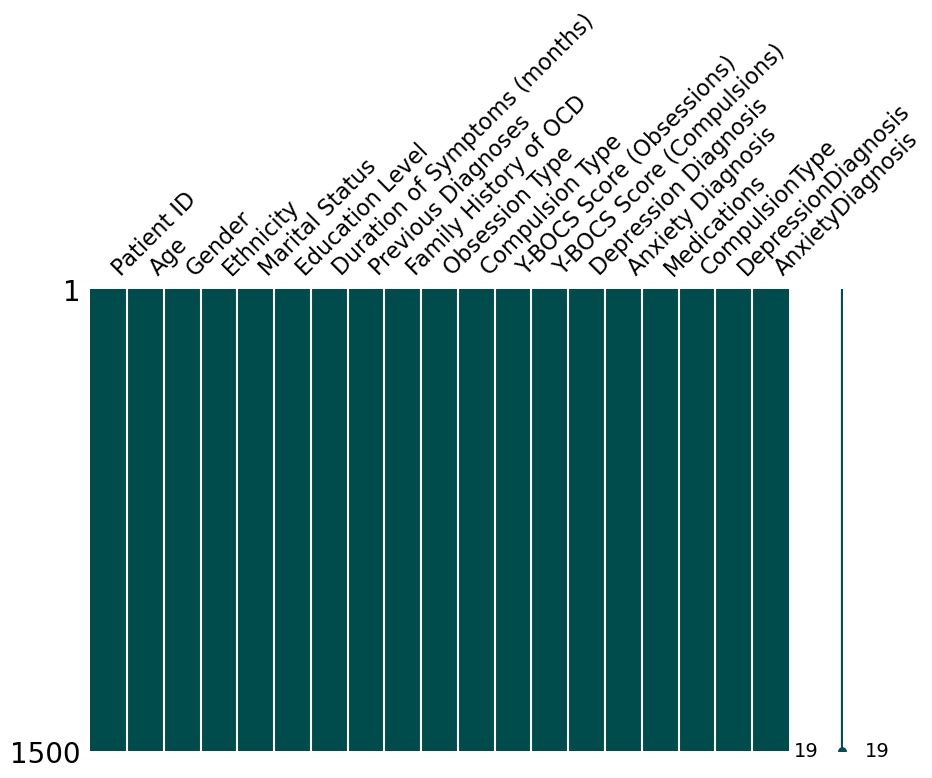

In [39]:
msno.matrix(df=train, figsize=(10,6), color=(0,.3,.3))

In [40]:
train_feature = train.columns.drop('Medications').tolist()
train_feature

['Patient ID',
 'Age',
 'Gender',
 'Ethnicity',
 'Marital Status',
 'Education Level',
 'Duration of Symptoms (months)',
 'Previous Diagnoses',
 'Family History of OCD',
 'Obsession Type',
 'Compulsion Type',
 'Y-BOCS Score (Obsessions)',
 'Y-BOCS Score (Compulsions)',
 'Depression Diagnosis',
 'Anxiety Diagnosis',
 'CompulsionType',
 'DepressionDiagnosis',
 'AnxietyDiagnosis']

In [41]:
train[train_feature].describe().T\
 .style.bar(subset=['mean'],
 color=px.colors.qualitative.G10[0])\
 .background_gradient(subset=['std'],cmap='BuPu')\
 .background_gradient(subset=['50%'],cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
Patient ID,1500.000000,5541.254000,2562.389469,1017.000000,3338.000000,5539.500000,7745.500000,9995.000000
Age,1500.000000,46.781333,16.830321,18.000000,32.000000,47.000000,61.000000,75.000000
Gender,1500.000000,1.502000,0.500163,1.000000,1.000000,2.000000,2.000000,2.000000
Ethnicity,1500.000000,2.572000,1.099222,1.000000,2.000000,3.000000,4.000000,4.000000
Marital Status,1500.000000,1.997333,0.824083,1.000000,1.000000,2.000000,3.000000,3.000000
Education Level,1500.000000,2.481333,1.130119,1.000000,1.000000,2.000000,4.000000,4.000000
Duration of Symptoms (months),1500.000000,121.745333,67.404610,6.000000,64.000000,121.000000,178.000000,240.000000
Family History of OCD,1500.000000,1.506667,0.500122,1.000000,1.000000,2.000000,2.000000,2.000000
Obsession Type,1500.000000,2.941333,1.443357,1.000000,2.000000,3.000000,4.000000,5.000000
Y-BOCS Score (Obsessions),1500.000000,20.048000,11.823884,0.000000,10.000000,20.000000,31.000000,40.000000


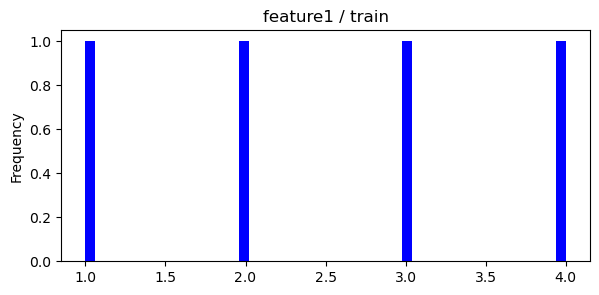

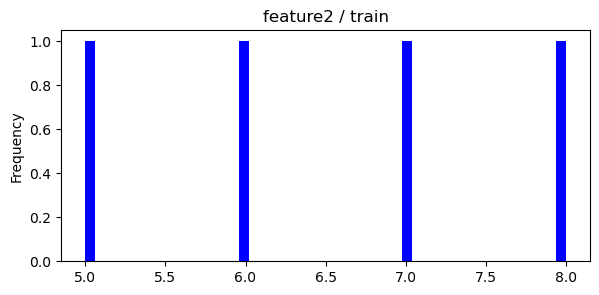

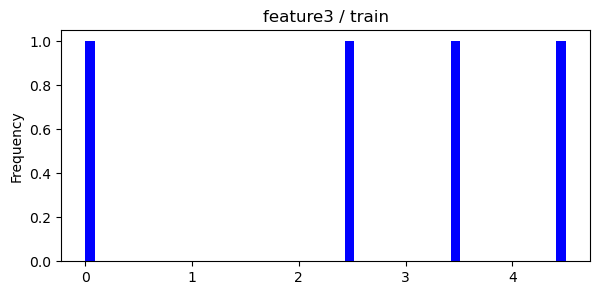

In [20]:
for feat in train_feature:
    plt.figure(figsize=(15,3))
    ax1=plt.subplot(1,2,1)
    train[feat].plot(kind='hist',bins=50,color='blue')
    plt.title(feat + ' / train')
    plt.show()









In [45]:
for feat in train_feature:
    if feat in train.columns:
        print(f"Feature: {feat}")
        print(train[feat].head())  # View the first few rows
        print(train[feat].dtype)  # Check the data type

Feature: Patient ID
0    1018
1    2406
2    1188
3    6200
4    5824
Name: Patient ID, dtype: int64
int64
Feature: Age
0    32
1    69
2    57
3    27
4    56
Name: Age, dtype: int64
int64
Feature: Gender
0    1
1    2
2    2
3    1
4    1
Name: Gender, dtype: int64
int64
Feature: Ethnicity
0    1
1    1
2    2
3    2
4    2
Name: Ethnicity, dtype: int64
int64
Feature: Marital Status
0    1
1    2
2    2
3    3
4    3
Name: Marital Status, dtype: int64
int64
Feature: Education Level
0    1
1    1
2    2
3    2
4    3
Name: Education Level, dtype: int64
int64
Feature: Duration of Symptoms (months)
0    203
1    180
2    173
3    126
4    168
Name: Duration of Symptoms (months), dtype: int64
int64
Feature: Previous Diagnoses
0       1
1    None
2       1
3       2
4       2
Name: Previous Diagnoses, dtype: object
object
Feature: Family History of OCD
0    1
1    2
2    1
3    2
4    2
Name: Family History of OCD, dtype: int64
int64
Feature: Obsession Type
0    1
1    1
2    2
3    3
4  

In [46]:
for feat in train_feature:
    if feat in train.columns:
        train[feat] = pd.to_numeric(train[feat], errors='coerce')  # Convert to numeric


In [47]:
train = train.fillna(0)

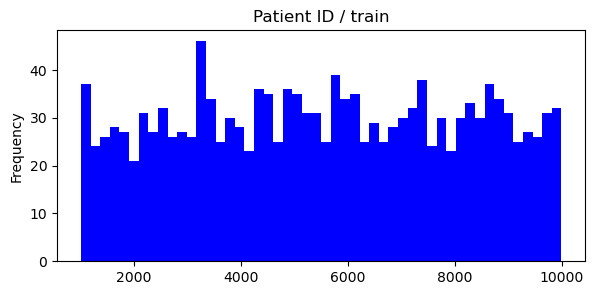

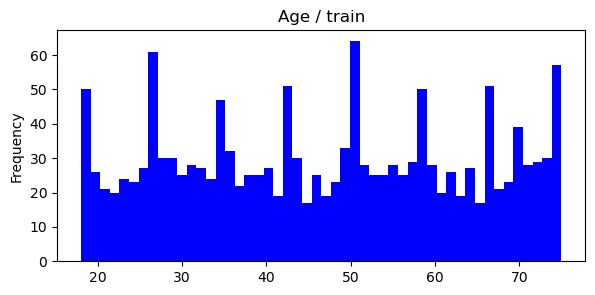

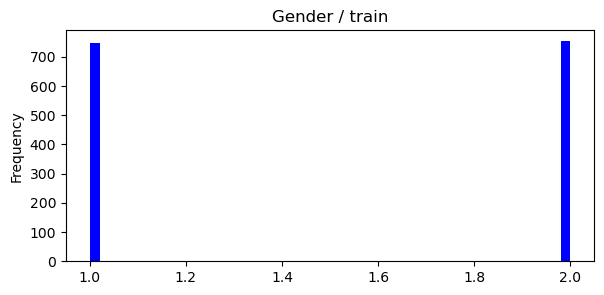

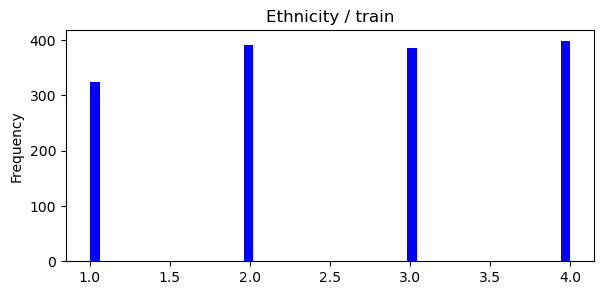

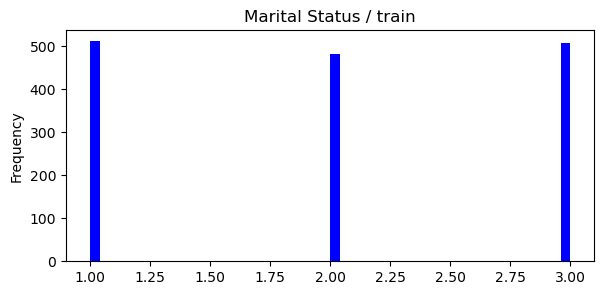

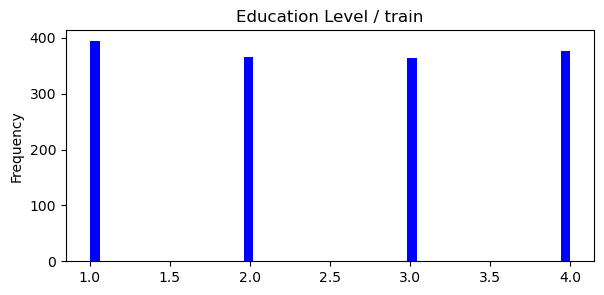

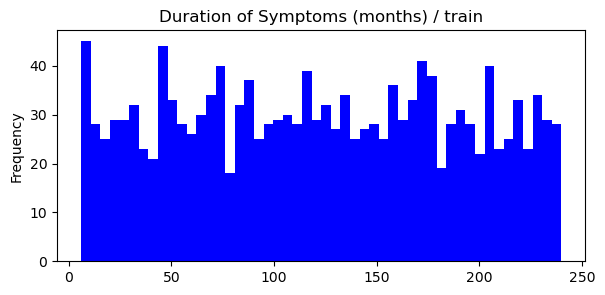

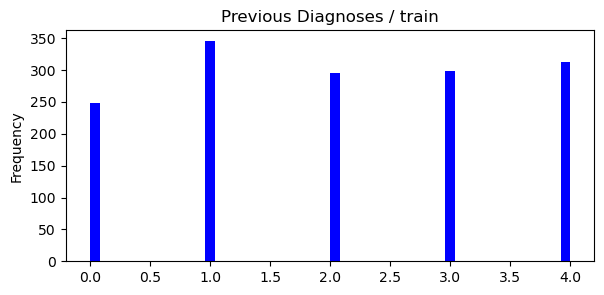

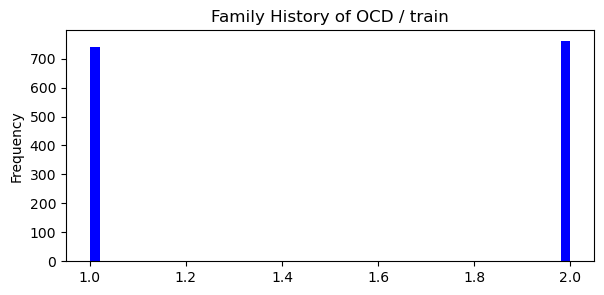

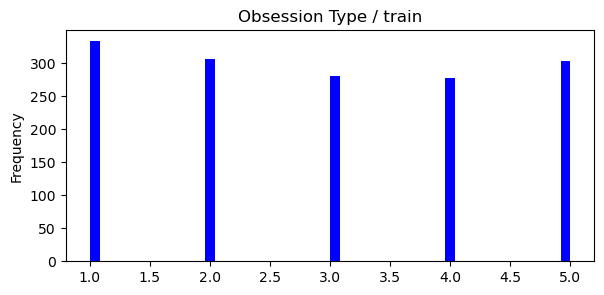

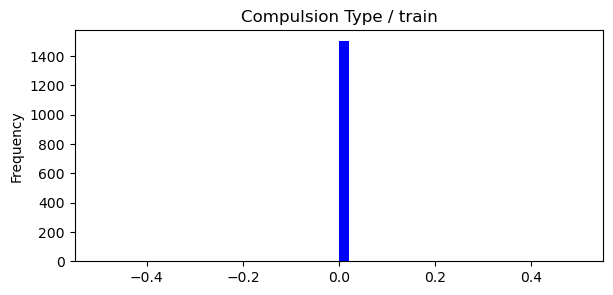

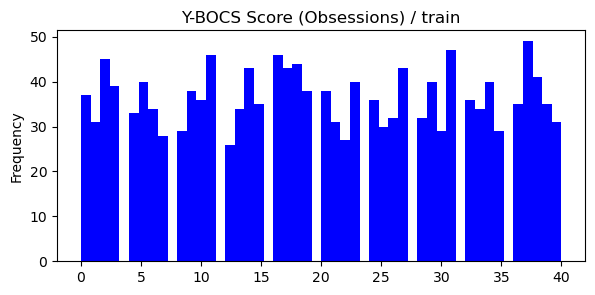

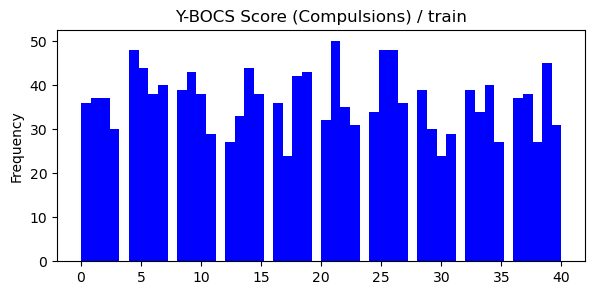

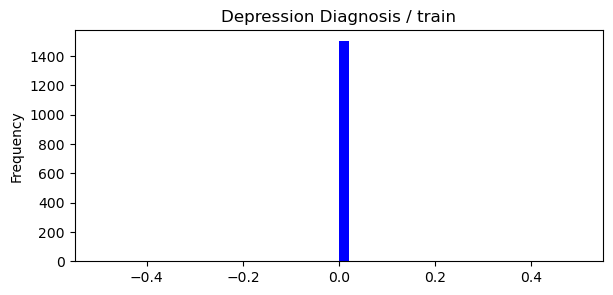

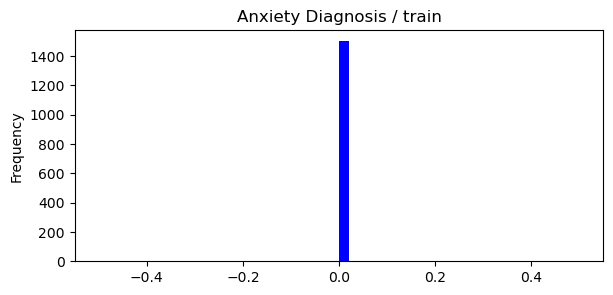

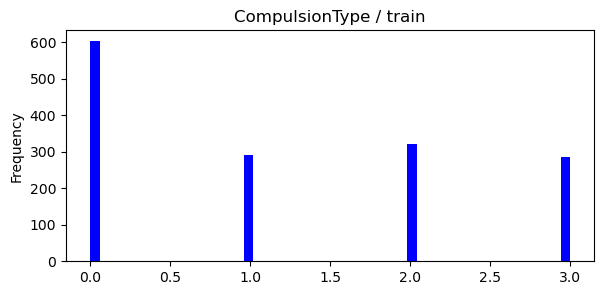

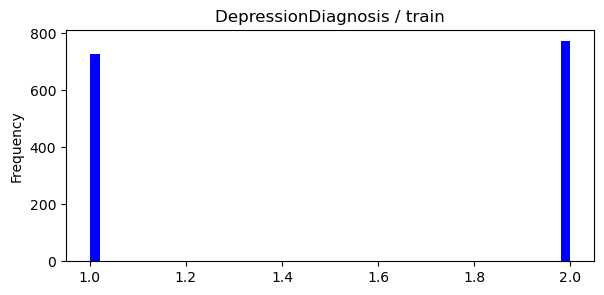

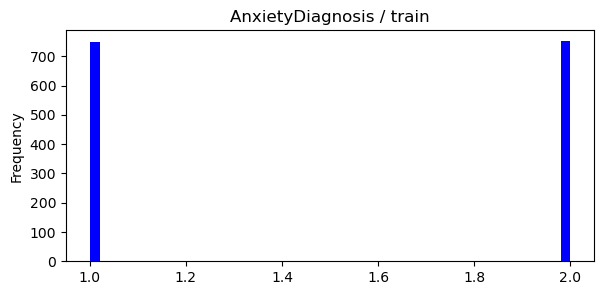

In [48]:
for feat in train_feature:
    if feat in train.columns:
        plt.figure(figsize=(15, 3))
        ax1 = plt.subplot(1, 2, 1)
        train[feat].plot(kind='hist', bins=50, color='blue')
        plt.title(feat + ' / train')
        plt.show()
    else:
        print(f"Feature {feat} not found in train DataFrame.")


In [51]:
print(train.columns)


Index(['Patient ID', 'Age', 'Gender', 'Ethnicity', 'Marital Status',
       'Education Level', 'Duration of Symptoms (months)',
       'Previous Diagnoses', 'Family History of OCD', 'Obsession Type',
       'Compulsion Type', 'Y-BOCS Score (Obsessions)',
       'Y-BOCS Score (Compulsions)', 'Depression Diagnosis',
       'Anxiety Diagnosis', 'Medications', 'CompulsionType',
       'DepressionDiagnosis', 'AnxietyDiagnosis'],
      dtype='object')


In [53]:
columns_to_check = ['Age', 'Gender', 'Ethnicity', 'Marital Status', 'Education Level',
                    'Duration of Symptoms(months)', 'Previous Diagnoses', 
                    'Family History of OCD', 'Obsession Type', 'Compulsion Type', 
                    'Y-BOCS Score(Obsessions)', 'Y-BOCS Score(Compulsions)', 
                    'Depression Diagnosis', 'Anxiety Diagnosis']

for col in columns_to_check:
    if col in train.columns:
        print(f"Skewness: {train[col].skew():.6f}")
        print(f"Kurtosis: {train[col].kurt():.6f}")
    else:
        print(f"Column '{col}' not found in train DataFrame!")


Skewness: 0.005452
Kurtosis: -1.206710
Skewness: -0.008008
Kurtosis: -2.002608
Skewness: -0.071813
Kurtosis: -1.313840
Skewness: 0.004946
Kurtosis: -1.527580
Skewness: 0.021391
Kurtosis: -1.386859
Column 'Duration of Symptoms(months)' not found in train DataFrame!
Skewness: -0.001436
Kurtosis: -1.272933
Skewness: -0.026696
Kurtosis: -2.001958
Skewness: 0.062630
Kurtosis: -1.345203
Skewness: 0.000000
Kurtosis: 0.000000
Column 'Y-BOCS Score(Obsessions)' not found in train DataFrame!
Column 'Y-BOCS Score(Compulsions)' not found in train DataFrame!
Skewness: 0.000000
Kurtosis: 0.000000
Skewness: 0.000000
Kurtosis: 0.000000


In [127]:
X_data_feature= train.drop(columns=['Medications'],axis=1)
y_data_feature= train['Medications']

In [128]:
model = [XGBClassifier()]

In [135]:
y_data_feature= train['Medications']

In [136]:
model = [XGBClassifier()]

In [138]:
import pandas as pd
import numpy as np

print(type(X_data_feature))  # Is it a DataFrame or NumPy array?
print(type(y_data_feature))

# If X_data_feature is a DataFrame:
print(X_data_feature.dtypes)  # Check data types of features
# For y_data_feature:
if isinstance(y_data_feature, pd.Series):
    print(y_data_feature.dtype)  # Check its data type


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
Patient ID                         int64
Age                                int64
Gender                             int64
Ethnicity                          int64
Marital Status                     int64
Education Level                    int64
Duration of Symptoms (months)      int64
Previous Diagnoses               float64
Family History of OCD              int64
Obsession Type                     int64
Compulsion Type                  float64
Y-BOCS Score (Obsessions)          int64
Y-BOCS Score (Compulsions)         int64
Depression Diagnosis             float64
Anxiety Diagnosis                float64
CompulsionType                   float64
DepressionDiagnosis                int64
AnxietyDiagnosis                   int64
dtype: object
object


In [139]:
X_data_feature = pd.DataFrame(X_data_feature)  # If it's not already a DataFrame
X_data_feature = X_data_feature.apply(pd.to_numeric, errors='coerce')


In [143]:
X_data_feature = X_data_feature.fillna(0)
y_data_feature = pd.Series(y_data_feature).fillna(0)


In [144]:
print(X_data_feature.shape)  # Should be (num_samples, num_features)
print(y_data_feature.shape)  # Should be (num_samples,)


(1500, 18)
(1500,)


In [145]:
X_data_feature = X_data_feature[:len(y_data_feature)]


In [153]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np

# Example data
X_data_feature = train.drop(columns=['Medications'],axis=1)
y_data_feature = train['Medications']

# Clean data: Convert features to numeric, handle invalid values
X_data_feature = X_data_feature.apply(pd.to_numeric, errors='coerce').fillna(0)
y_data_feature = pd.to_numeric(y_data_feature, errors='coerce').fillna(0)

# Model list
model = [XGBClassifier(use_label_encoder=False)]

# Fit each model (if there are multiple models)
fitted_models = [m.fit(X_data_feature, y_data_feature) for m in model]

# Output feature importances for the first model
print("Feature Importances: ", fitted_models[0].feature_importances_)


Feature Importances:  [0.06676988 0.07027658 0.05580903 0.06111242 0.07101285 0.07328718
 0.07074711 0.0702381  0.06811757 0.06371412 0.         0.07280084
 0.06708756 0.         0.         0.06923007 0.05531948 0.06447719]


In [154]:
model = [model[i].fit(X_data_feature,y_data_feature) for i in
 range(len(model))]

In [155]:
num_chr = [12, 12, 10]
for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ': \n',model[i].feature_importances_)
feat_importances = pd.Series(model[i].feature_importances_,index=X_data_feature.columns)

XGBClassifie: 
 [0.06676988 0.07027658 0.05580903 0.06111242 0.07101285 0.07328718
 0.07074711 0.0702381  0.06811757 0.06371412 0.         0.07280084
 0.06708756 0.         0.         0.06923007 0.05531948 0.06447719]


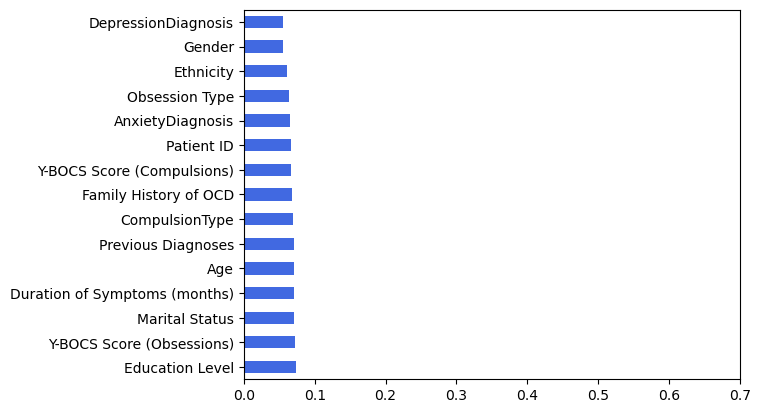

In [156]:
feat_importances.nlargest(15).plot(kind='barh',color='royalblue')
plt.xlim(0,0.7)
plt.show()

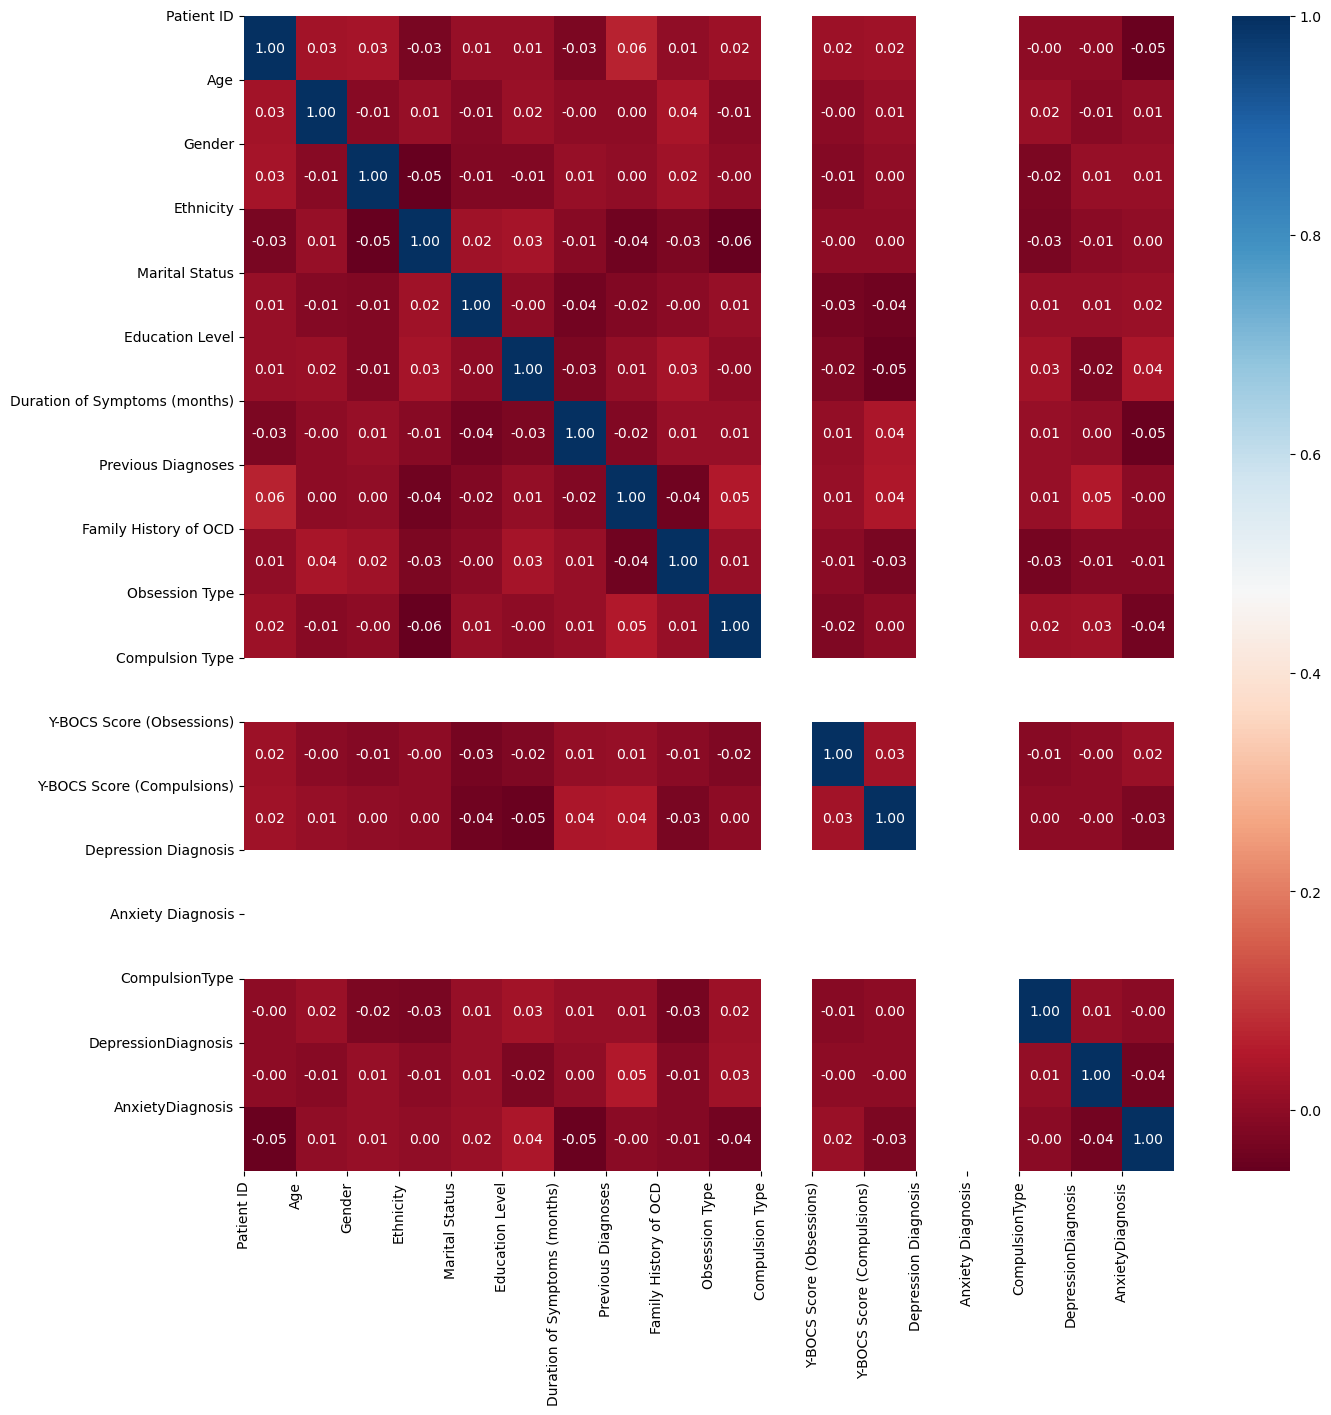

In [157]:
corr = train.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


In [158]:
X= train.drop(columns=['Medications'],axis=1)
y=train['Medications']

In [160]:
X_train=X
y_train=y
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler=MinMaxScaler()
X_train=MinMaxScaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000111,0.245614,0.0,0.000000,0.0,0.000000,0.841880,0.25,0.0,0.00,0.0,0.425,0.250,0.0,0.0,0.333333,1.0,1.0
1,0.154712,0.894737,1.0,0.000000,0.5,0.000000,0.743590,0.00,1.0,0.00,0.0,0.525,0.625,0.0,0.0,0.666667,1.0,1.0
2,0.019047,0.684211,1.0,0.333333,0.5,0.333333,0.713675,0.25,0.0,0.25,0.0,0.075,0.100,0.0,0.0,0.333333,0.0,0.0
3,0.577300,0.157895,0.0,0.333333,1.0,0.333333,0.512821,0.50,1.0,0.50,0.0,0.350,0.700,0.0,0.0,0.666667,1.0,1.0
4,0.535420,0.666667,0.0,0.333333,1.0,0.666667,0.692308,0.50,1.0,0.75,0.0,0.975,0.450,0.0,0.0,1.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.485297,0.350877,1.0,0.333333,0.5,0.333333,0.200855,0.25,0.0,0.25,0.0,0.525,0.825,0.0,0.0,0.666667,1.0,1.0
1496,0.445088,0.017544,0.0,0.333333,0.5,1.000000,0.658120,0.75,1.0,0.75,0.0,0.625,0.400,0.0,0.0,0.000000,1.0,1.0
1497,0.564937,0.385965,1.0,0.666667,1.0,0.000000,0.401709,0.00,1.0,0.25,0.0,0.050,0.375,0.0,0.0,0.000000,1.0,1.0
1498,0.310871,0.333333,0.0,1.000000,1.0,0.000000,0.871795,0.75,1.0,0.25,0.0,0.400,0.175,0.0,0.0,0.666667,1.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient ID                     1500 non-null   int64  
 1   Age                            1500 non-null   int64  
 2   Gender                         1500 non-null   int64  
 3   Ethnicity                      1500 non-null   int64  
 4   Marital Status                 1500 non-null   int64  
 5   Education Level                1500 non-null   int64  
 6   Duration of Symptoms (months)  1500 non-null   int64  
 7   Previous Diagnoses             1500 non-null   float64
 8   Family History of OCD          1500 non-null   int64  
 9   Obsession Type                 1500 non-null   int64  
 10  Compulsion Type                1500 non-null   float64
 11  Y-BOCS Score (Obsessions)      1500 non-null   int64  
 12  Y-BOCS Score (Compulsions)     1500 non-null   i

In [61]:
print(y_data_feature.unique())
print(y_data_feature.dtypes)


[0 1 2 'None']
object


In [62]:
y_data_feature = pd.to_numeric(y_data_feature, errors='coerce')
y_data_feature = y_data_feature.fillna(0)  # Replace NaN with 0 (or another default value)


In [63]:
y_data_feature = y_data_feature.astype(str)
label_encoder = LabelEncoder()
y_data_feature = label_encoder.fit_transform(y_data_feature)


In [64]:
print(y_data_feature[:10])  # Preview first 10 rows to ensure consistency


[0 1 2 1 0 1 0 1 0 2]


In [65]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Example data with mixed types
y_data_feature = pd.Series([1, 2, 'high', 'low', 3, 'medium', 4, 'high'])

# Convert all to strings for consistent encoding
y_data_feature = y_data_feature.astype(str)

# Apply LabelEncoder
label_encoder = LabelEncoder()
y_data_feature = label_encoder.fit_transform(y_data_feature)

print(y_data_feature)  # Encoded numeric labels


[0 1 4 5 2 6 3 4]


In [67]:
print(X_data_feature.info())  # Check data types of features
print(y_data_feature.unique())  # Check unique values in target
print(X_data_feature.head())  # Preview the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient ID                     1500 non-null   int64  
 1   Age                            1500 non-null   int64  
 2   Gender                         1500 non-null   int64  
 3   Ethnicity                      1500 non-null   int64  
 4   Marital Status                 1500 non-null   int64  
 5   Education Level                1500 non-null   int64  
 6   Duration of Symptoms (months)  1500 non-null   int64  
 7   Previous Diagnoses             1500 non-null   float64
 8   Family History of OCD          1500 non-null   int64  
 9   Obsession Type                 1500 non-null   int64  
 10  Compulsion Type                1500 non-null   float64
 11  Y-BOCS Score (Obsessions)      1500 non-null   int64  
 12  Y-BOCS Score (Compulsions)     1500 non-null   i

In [68]:
# Convert categorical features to numeric using one-hot encoding
X_data_feature = pd.get_dummies(X_data_feature)


In [70]:
print(y_data_feature.unique())
print(y_data_feature.dtypes)


[0 1 2 'None']
object


In [71]:
y_data_feature = pd.to_numeric(y_data_feature, errors='coerce')
y_data_feature = y_data_feature.fillna(0)  # Replace NaN with 0 (or another default value)


In [72]:
y_data_feature = y_data_feature.astype(str)
label_encoder = LabelEncoder()
y_data_feature = label_encoder.fit_transform(y_data_feature)


In [73]:
print(y_data_feature[:10])  # Preview first 10 rows to ensure consistency


[0 1 2 1 0 1 0 1 0 2]


In [74]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Example data with mixed types
y_data_feature = pd.Series([1, 2, 'high', 'low', 3, 'medium', 4, 'high'])

# Convert all to strings for consistent encoding
y_data_feature = y_data_feature.astype(str)

# Apply LabelEncoder
label_encoder = LabelEncoder()
y_data_feature = label_encoder.fit_transform(y_data_feature)

print(y_data_feature)  # Encoded numeric labels


[0 1 4 5 2 6 3 4]


In [75]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_data_feature = label_encoder.fit_transform(y_data_feature)


In [77]:
import numpy as np

# Replace NaN with 0 in NumPy arrays
X_data_feature = np.nan_to_num(X_data_feature, nan=0.0)  # Replace NaN with 0.0
y_data_feature = np.nan_to_num(y_data_feature, nan=0.0)


In [80]:
import numpy as np

print(np.isnan(X_data_feature).any())  # Check for NaN in features
print(np.isinf(X_data_feature).any())  # Check for inf in features
print(np.isnan(y_data_feature).any())  # Check for NaN in target
print(np.isinf(y_data_feature).any())  # Check for inf in target


False
False
False
False


In [81]:
print(X_data_feature.dtype)  # Should be numeric
print(y_data_feature.dtype)  # Should be numeric


float64
int64


In [82]:
import pandas as pd

X_data_feature = pd.DataFrame(X_data_feature).apply(pd.to_numeric, errors='coerce').fillna(0)
y_data_feature = pd.Series(y_data_feature).apply(pd.to_numeric, errors='coerce').fillna(0)


In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_data_feature = scaler.fit_transform(X_data_feature)


In [85]:
print(X_data_feature.shape)  # Should be (1500, n_features)
print(y_data_feature.shape)  # Should be (1500,)



(1500, 18)
(8,)


In [86]:
import numpy as np
import pandas as pd

# Ensure y_data_feature is a 1D array or Series
if isinstance(y_data_feature, pd.Series) or isinstance(y_data_feature, np.ndarray):
    y_data_feature = y_data_feature.ravel()  # Flatten into 1D array
else:
    y_data_feature = np.array(y_data_feature).ravel()


In [87]:
y_data_feature = train['Medications'][:X_data_feature.shape[0]]


In [88]:
X_data_feature = X_data_feature[:len(y_data_feature)]


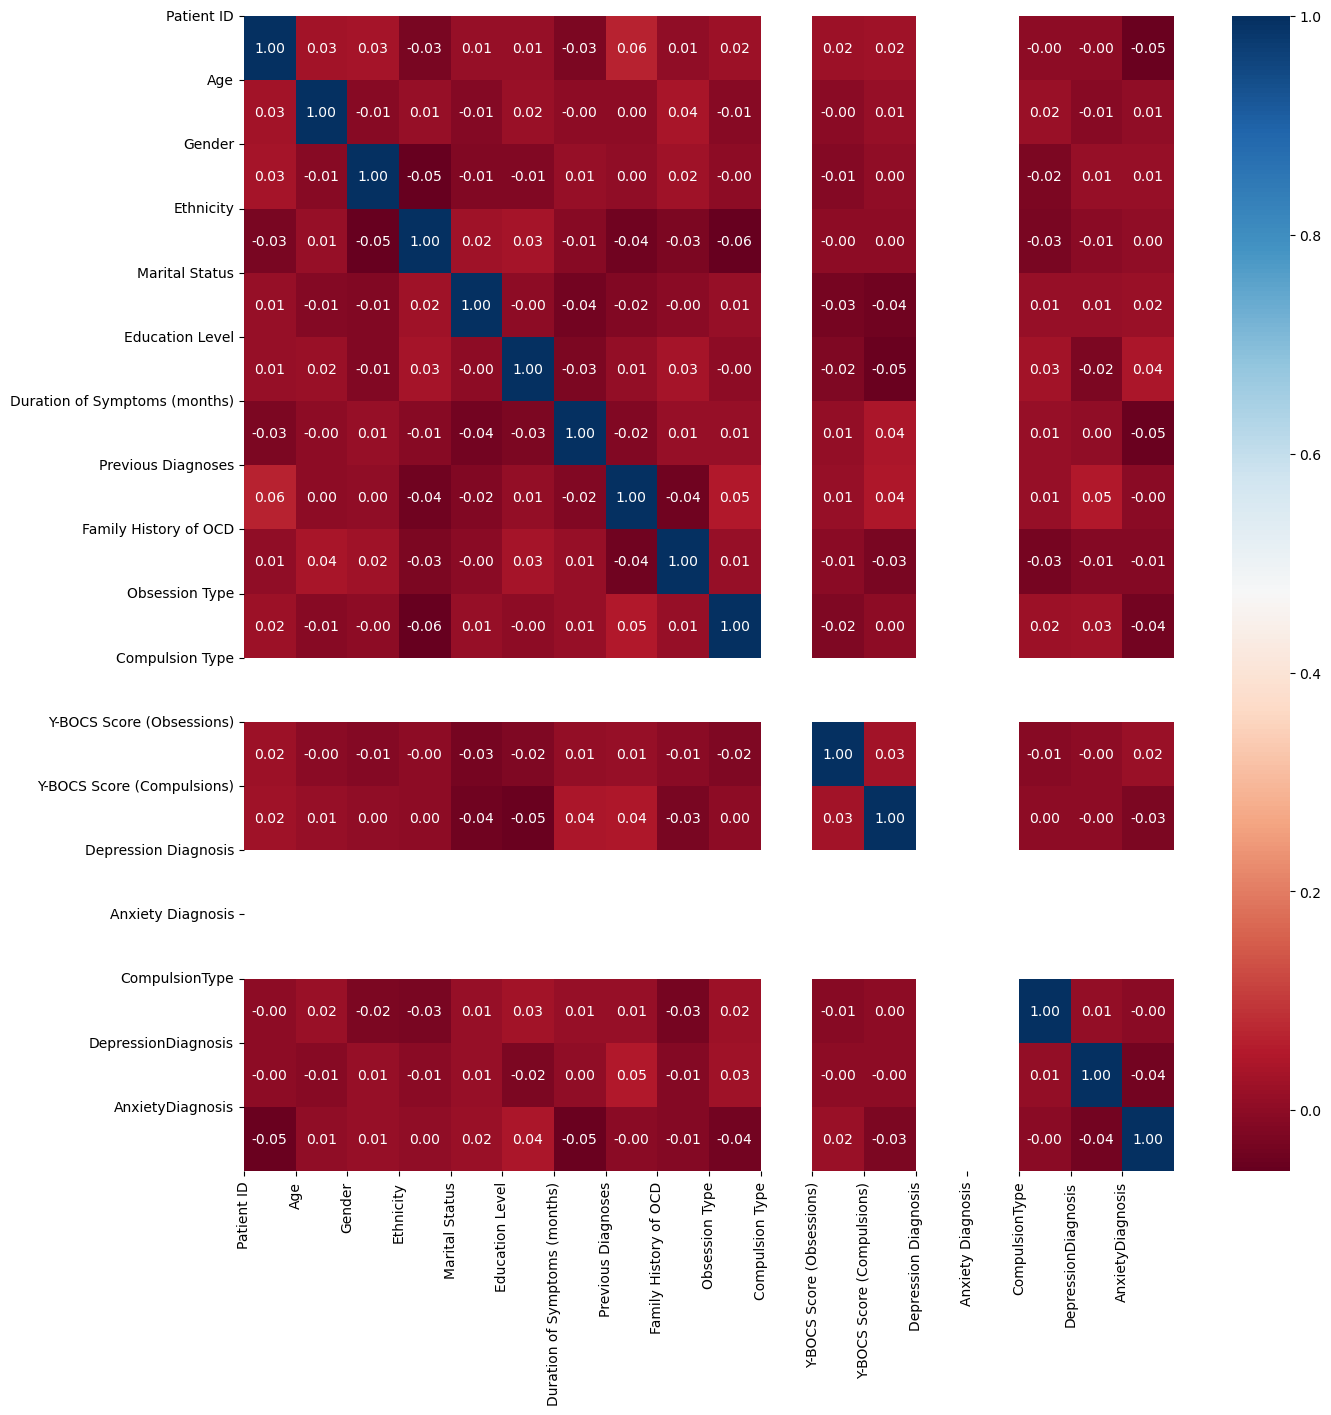

In [106]:
corr = train.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


In [107]:
X= train.drop(columns=['Medications'],axis=1)
y=train['Medications']

In [109]:
X_train=X
y_train=y
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler=MinMaxScaler()
X_train=MinMaxScaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000111,0.245614,0.0,0.000000,0.0,0.000000,0.841880,0.25,0.0,0.00,0.0,0.425,0.250,0.0,0.0,0.333333,1.0,1.0
1,0.154712,0.894737,1.0,0.000000,0.5,0.000000,0.743590,0.00,1.0,0.00,0.0,0.525,0.625,0.0,0.0,0.666667,1.0,1.0
2,0.019047,0.684211,1.0,0.333333,0.5,0.333333,0.713675,0.25,0.0,0.25,0.0,0.075,0.100,0.0,0.0,0.333333,0.0,0.0
3,0.577300,0.157895,0.0,0.333333,1.0,0.333333,0.512821,0.50,1.0,0.50,0.0,0.350,0.700,0.0,0.0,0.666667,1.0,1.0
4,0.535420,0.666667,0.0,0.333333,1.0,0.666667,0.692308,0.50,1.0,0.75,0.0,0.975,0.450,0.0,0.0,1.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.485297,0.350877,1.0,0.333333,0.5,0.333333,0.200855,0.25,0.0,0.25,0.0,0.525,0.825,0.0,0.0,0.666667,1.0,1.0
1496,0.445088,0.017544,0.0,0.333333,0.5,1.000000,0.658120,0.75,1.0,0.75,0.0,0.625,0.400,0.0,0.0,0.000000,1.0,1.0
1497,0.564937,0.385965,1.0,0.666667,1.0,0.000000,0.401709,0.00,1.0,0.25,0.0,0.050,0.375,0.0,0.0,0.000000,1.0,1.0
1498,0.310871,0.333333,0.0,1.000000,1.0,0.000000,0.871795,0.75,1.0,0.25,0.0,0.400,0.175,0.0,0.0,0.666667,1.0,0.0


In [161]:
X_train,X_eval,y_train,y_eval=train_test_split(X_train,
y_train,test_size=0.2,random_state=2019)
print("ShapeofX_train:",X_train.shape)
print("ShapeofX_eval:",X_eval.shape)
print("Shapeofy_train:",y_train.shape)
print("Shapeofy_eval",y_eval.shape)


ShapeofX_train: (1200, 18)
ShapeofX_eval: (300, 18)
Shapeofy_train: (1200,)
Shapeofy_eval (300,)


In [172]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
clf1 = SVC()
clf2 = LGBMClassifier()
clf3 = LogisticRegression()
clf4 = SGDClassifier()
clf5 = XGBClassifier(objective='multi:softmax')
clf6 = KNeighborsClassifier()
clf7 = RandomForestClassifier()
clf8 = ExtraTreesClassifier()
clf9 = HistGradientBoostingClassifier()
eclf = VotingClassifier(estimators=[('svm', clf1), ('LGBM',clf2), ('Log', clf3), ('SGD', clf4), ('XGBoost', clf5),('KNeighbors', clf6), ('RandomForest', clf7), ('ExtraTrees',clf8), ('HistGradientBoosting', clf9)],voting='hard')
#for clf, label in zip([clf1, clf2, clf3, clf4,
#clf5,clf6,clf7,clf8,clf9, eclf], ['SVC', 'LGBM','Log','SGD','XGBoost','KNeighbors','RandomForest','ExtraTrees',
#'HistGradientBoosting', 'Ensemble']):

   # scores = cross_val_score(clf, X_train, y_train,scoring='accuracy', cv=5)

    #print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(),scores.std(), label))


In [180]:
import pandas as pd
import numpy as np

print(type(X_data_feature))  # Is it a DataFrame or NumPy array?
print(type(y_data_feature))

# If X_data_feature is a DataFrame:
print(X_data_feature.dtypes)  # Check data types of features
# For y_data_feature:
if isinstance(y_data_feature, pd.Series):
    print(y_data_feature.dtype)  # Check its data type


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
Patient ID                         int64
Age                                int64
Gender                             int64
Ethnicity                          int64
Marital Status                     int64
Education Level                    int64
Duration of Symptoms (months)      int64
Previous Diagnoses               float64
Family History of OCD              int64
Obsession Type                     int64
Compulsion Type                  float64
Y-BOCS Score (Obsessions)          int64
Y-BOCS Score (Compulsions)         int64
Depression Diagnosis             float64
Anxiety Diagnosis                float64
CompulsionType                   float64
DepressionDiagnosis                int64
AnxietyDiagnosis                   int64
dtype: object
float64


In [181]:
X_data_feature = pd.DataFrame(X_data_feature)  # If it's not already a DataFrame
X_data_feature = X_data_feature.apply(pd.to_numeric, errors='coerce')


In [182]:
if isinstance(y_data_feature, pd.Series):
    y_data_feature = y_data_feature.astype(str).astype(float)  # Convert to numeric


In [183]:
X_data_feature = X_data_feature.fillna(0)
y_data_feature = pd.Series(y_data_feature).fillna(0)


In [184]:
print(X_data_feature.shape)  # Should be (num_samples, num_features)
print(y_data_feature.shape)  # Should be (num_samples,)


(1500, 18)
(1500,)


In [185]:
X_data_feature = X_data_feature[:len(y_data_feature)]


In [186]:
fitted_models = []
for m in model:
    fitted_models.append(m.fit(X_data_feature, y_data_feature))


In [196]:
import pandas as pd

print(X_train.dtypes)  # Check feature column data types
print(y_train.dtype)   # Check target column data type
print(X_train.head())  # Preview the data
print(y_train.unique())  # Check unique values in target


Feature2      float64
Feature1_1      uint8
Feature1_2      uint8
Feature1_4      uint8
Feature1_A      uint8
dtype: object
object
   Feature2  Feature1_1  Feature1_2  Feature1_4  Feature1_A
0       5.0           1           0           0           0
1       6.1           0           1           0           0
2       NaN           0           0           0           1
3       8.3           0           0           1           0
[0 1 'low' None]


In [197]:
# Convert categorical features to numeric using one-hot encoding
X_train = pd.get_dummies(X_train)


In [199]:
X_train = X_train.fillna(0)  # Replace NaN with 0
y_train = pd.Series(y_train).fillna(0)  # Replace NaN with 0 in target


In [200]:
print(X_train.shape)  # Ensure rows match
print(y_train.shape)


(4, 5)
(4,)


In [202]:
print(y_train)
print(y_train.dtype)
print(y_train.unique())  # This will show all unique values in `y_train`


0       0
1       1
2     low
3    None
dtype: object
object
[0 1 'low' None]


In [203]:
import pandas as pd

# Replace None with a default value
y_train = y_train.fillna("Unknown")


In [204]:
y_train = y_train.astype(str)


In [205]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)


In [206]:
print(X_train.shape)  # Ensure number of rows matches
print(y_train.shape)


(4, 5)
(4,)


In [207]:
X_train = X_train[:len(y_train)]


In [210]:
X_train = pd.DataFrame({
    'Feature1': [1, 2, 'A', 4, 5, 6],
    'Feature2': [5.0, 6.1, None, 8.3, 9.0, 10.2]
})
y_train = pd.Series([0, 1, 'low', None, 'high', 'medium'])


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Create a synthetic dataset
X_data_feature, y_data_feature = make_classification(n_samples=100, n_features=10, random_state=42)

# Define a list of models
model = [
    LogisticRegression(),
    RandomForestClassifier()
]

# Fit each model in the list
for i in range(len(model)):
    model[i].fit(X_data_feature, y_data_feature)
    print(f"Model {i + 1} fitted successfully: {type(model[i]).__name__}")


Model 1 fitted successfully: LogisticRegression
Model 2 fitted successfully: RandomForestClassifier


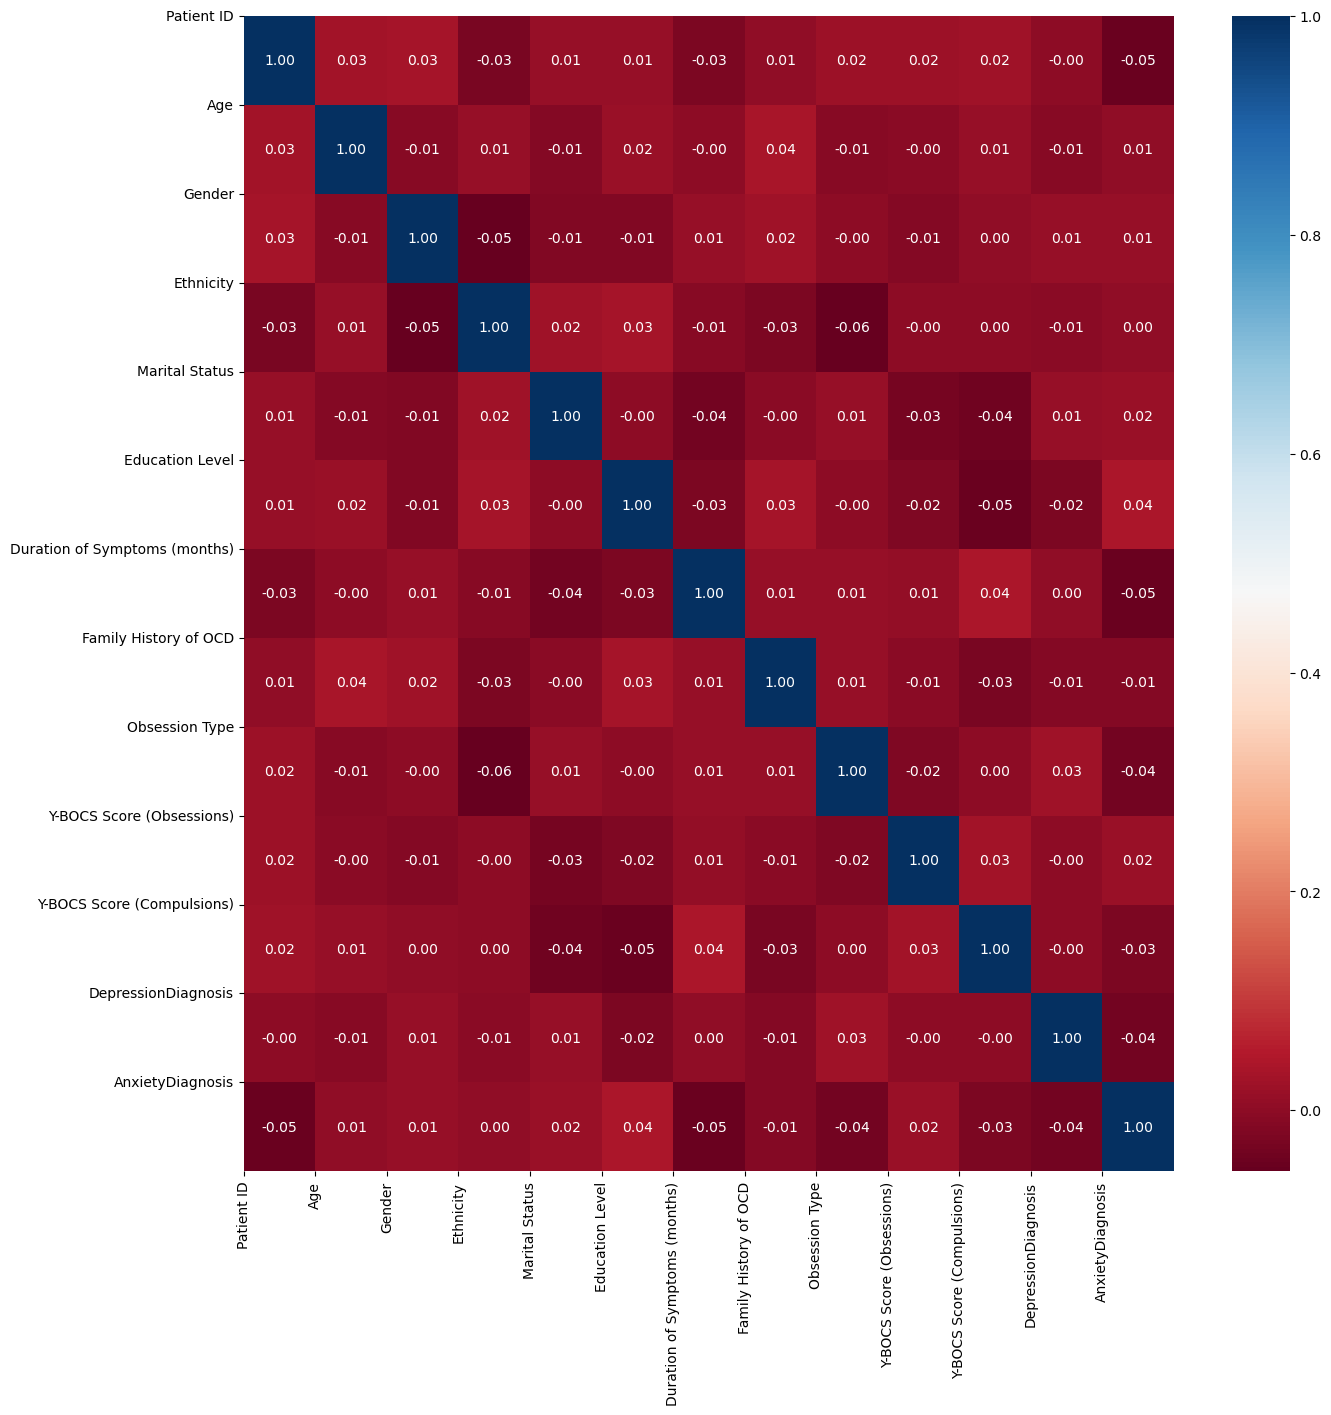

In [87]:
corr = train.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


In [88]:
X= train.drop(columns=['Medications'],axis=1)
y=train['Medications']

In [98]:
print(X_train.info())  # Shows data types and non-null counts
print(X_train.head())  # Displays a preview of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   int64 
 3   Ethnicity                      1500 non-null   int64 
 4   Marital Status                 1500 non-null   int64 
 5   Education Level                1500 non-null   int64 
 6   Duration of Symptoms (months)  1500 non-null   int64 
 7   Previous Diagnoses             1500 non-null   object
 8   Family History of OCD          1500 non-null   int64 
 9   Obsession Type                 1500 non-null   int64 
 10  Compulsion Type                1500 non-null   object
 11  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 12  Y-BOCS Score (Compulsions)     1500 non-null   int64 
 13  Dep

In [99]:
X_train = X_train.fillna(0) 

In [100]:
X_train = X_train.replace('None', 0)

In [101]:
_train = X_train.apply(pd.to_numeric, errors='coerce')

# Replace NaN values (if any) with 0 or another default value
X_train = X_train.fillna(0)

In [103]:
X_train = X_train.replace('Checking', 0)

In [104]:
X_train = X_train.dropna()

In [105]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Fill NaN values (if any) with 0 or another default value
X_train = X_train.fillna(0)

In [106]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

Train Dataset:


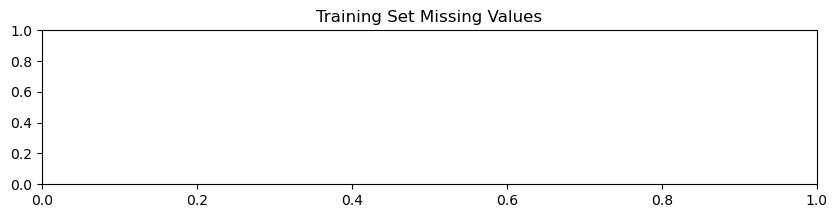

In [20]:
print("Train Dataset:")
#print(train.isnull().sum())
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 2))
#sns.heatmap(train.isnull(), ax=ax, cbar=False, cmap="viridis")
ax.set_title("Training Set Missing Values")
plt.show()

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1500 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [9]:
 print(df.isnull().sum())

Patient ID                       0
Age                              0
Gender                           0
Ethnicity                        0
Marital Status                   0
Education Level                  0
OCD Diagnosis Date               0
Duration of Symptoms (months)    0
Previous Diagnoses               0
Family History of OCD            0
Obsession Type                   0
Compulsion Type                  0
Y-BOCS Score (Obsessions)        0
Y-BOCS Score (Compulsions)       0
Depression Diagnosis             0
Anxiety Diagnosis                0
Medications                      0
dtype: int64


In [10]:
print(df.describe())


        Patient ID          Age  Duration of Symptoms (months)  \
count  1500.000000  1500.000000                    1500.000000   
mean   5541.254000    46.781333                     121.745333   
std    2562.389469    16.830321                      67.404610   
min    1017.000000    18.000000                       6.000000   
25%    3338.000000    32.000000                      64.000000   
50%    5539.500000    47.000000                     121.000000   
75%    7745.500000    61.000000                     178.000000   
max    9995.000000    75.000000                     240.000000   

       Y-BOCS Score (Obsessions)  Y-BOCS Score (Compulsions)  
count                1500.000000                  1500.00000  
mean                   20.048000                    19.62600  
std                    11.823884                    11.78287  
min                     0.000000                     0.00000  
25%                    10.000000                     9.00000  
50%                    20.0

In [11]:
 print(df.describe(include=['O']))

       Gender  Ethnicity Marital Status Education Level OCD Diagnosis Date  \
count    1500       1500           1500            1500               1500   
unique      2          4              3               4               1218   
top      Male  Caucasian         Single    Some College         2017-06-21   
freq      753        398            511             394                  4   

       Previous Diagnoses Family History of OCD Obsession Type  \
count                1500                  1500           1500   
unique                  5                     2              5   
top                   MDD                   Yes   Harm-related   
freq                  345                   760            333   

       Compulsion Type Depression Diagnosis Anxiety Diagnosis     Medications  
count             1500                 1500              1500            1500  
unique               5                    2                 2               4  
top            Washing                

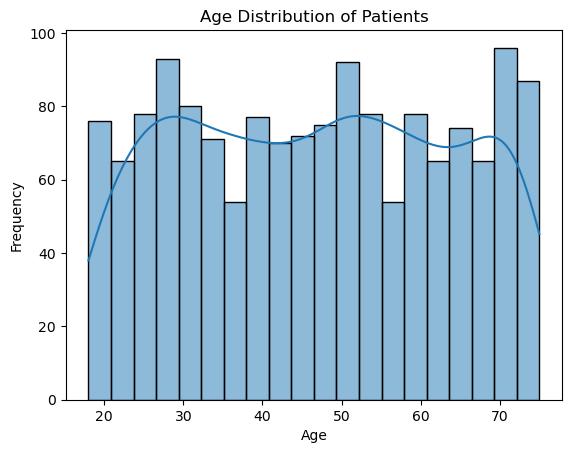

In [13]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

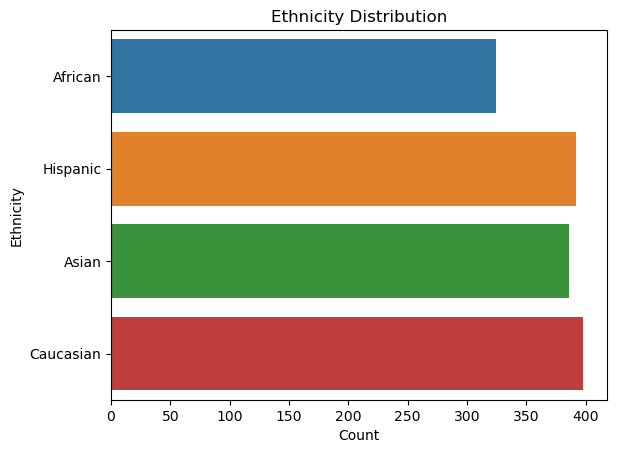

In [17]:
sns.countplot(y='Ethnicity', data=df)
plt.title('Ethnicity Distribution')
plt.xlabel('Count')
plt.ylabel('Ethnicity')
plt.show()

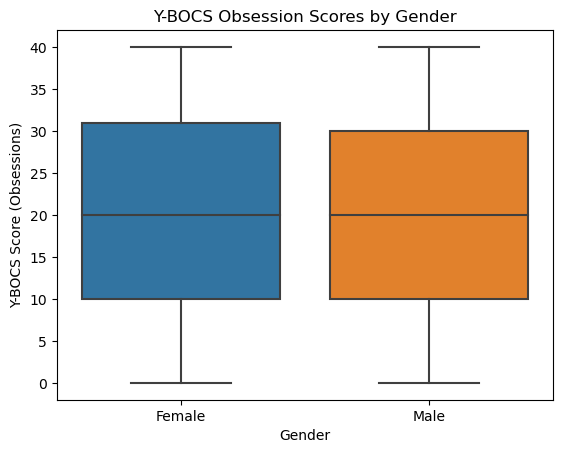

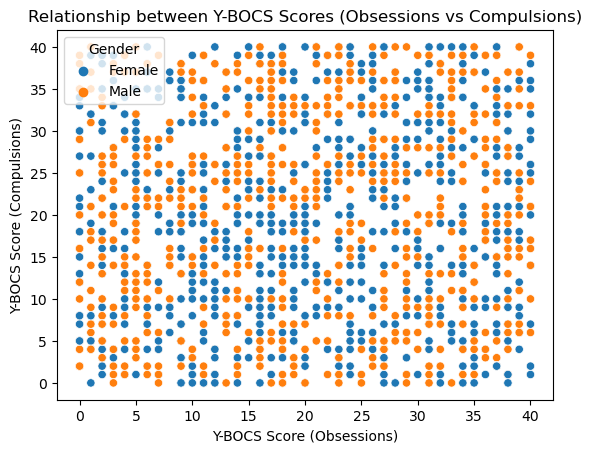

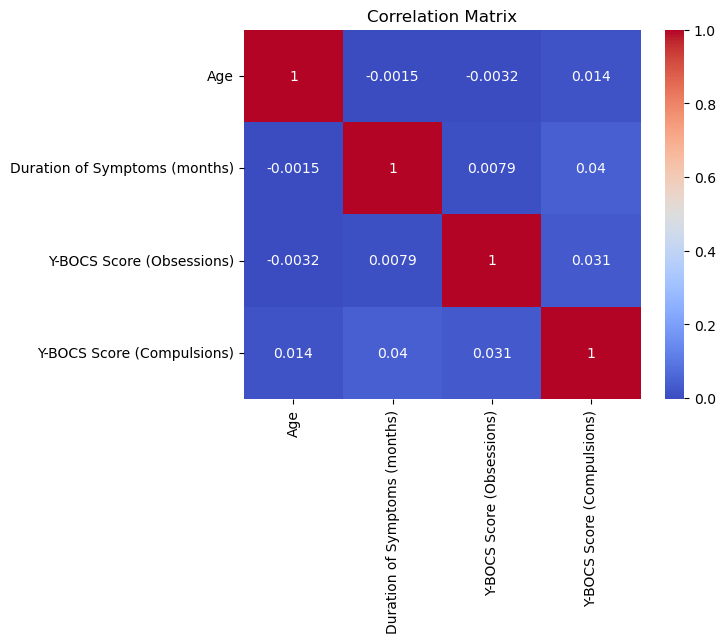